In [15]:
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
from ipywidgets import interactive
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [13]:
%run "../Pokemon EDA-Core.ipynb"


[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18]


In [14]:
#data = pd.read_csv("../Pokemon.csv")
data.head()



,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Evolution,CP
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1,364
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,2,586
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,3,982
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,4,1380
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1,300


In [17]:
df = pd.DataFrame(data)

# Combine 'Type 1' and 'Type 2' into a single column
stacked_types = pd.concat([df['Type 1'], df['Type 2'].replace('None', '')]).dropna()

# Get the frequency of each combined type
type_frequencies = stacked_types.value_counts().reset_index(name='Frequency')
type_frequencies.head()





,index,Frequency
0,Water,126
1,Normal,102
2,Flying,101
3,Grass,95
4,Psychic,90


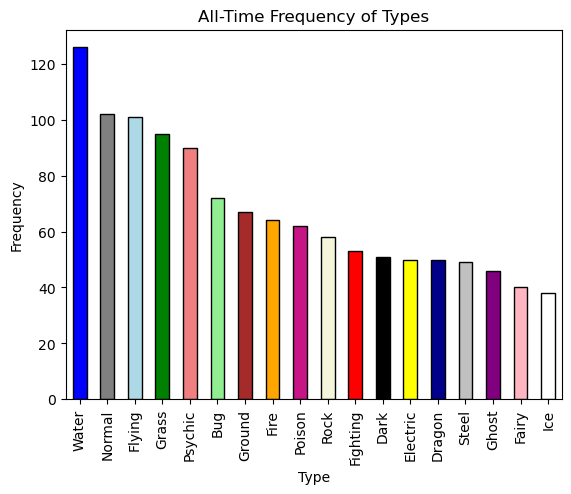

In [60]:
# Create a bar chart with custom colors and borders
type_frequencies.plot(kind='bar', x='index', y='Frequency', color=[type_colors.get(type, 'gray') for type in type_frequencies['index']], edgecolor='black')
plt.ylabel('Frequency')
plt.xlabel('Type')
plt.title('All-Time Frequency of Types')
plt.legend().set_visible(False)  # This line hides the legend - we are using the colors associated to the type
plt.show()

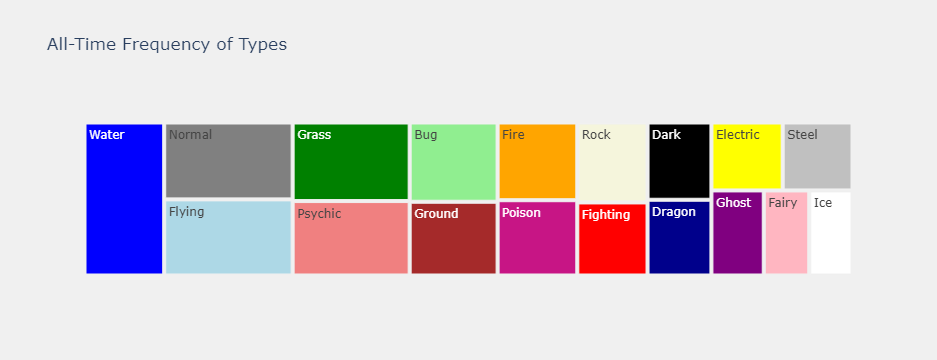

In [23]:
# Assuming type_frequencies is a DataFrame with columns 'index' and 'Frequency'
fig_treemap_types = px.treemap(type_frequencies, 
                 path=['index'],
                 values='Frequency',
                 color='index',
                 color_discrete_map=type_colors,
                 title='All-Time Frequency of Types')

# Hide the legend
fig_treemap_types.update_layout(legend=dict(title=dict(text='Type'), orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))
# Set background color for the entire figure
fig_treemap_types.update_layout(
    plot_bgcolor='rgb(240,240,240)',  # Background color of the plot area
    paper_bgcolor='rgb(240,240,240)'  # Background color of the entire figure
)
# Show the treemap with border
fig_treemap_types.show()

In [6]:
# Combine 'Type 1' and 'Type 2' into a single column
stacked_types = pd.concat([df['Type 1'], df['Type 2'].replace('None', '')])

# Create a DataFrame with the stacked types and count frequencies
type_counts = stacked_types.value_counts()
    



In [13]:
# Give me a dataset of each Generation and Types introduced
# Create DataFrames for 'Type 1' and 'Type 2' with 'Generation' column
df_type1 = df[['Type 1', 'Generation']].rename(columns={'Type 1': 'Type'})
df_type2 = df[['Type 2', 'Generation']].rename(columns={'Type 2': 'Type'})

# Concatenate the two DataFrames
stacked_types_generation = pd.concat([df_type1, df_type2.replace('None', '')])

# Display the result
print(stacked_types_generation)

      Type  Generation
0    Grass           1
1    Grass           1
2    Grass           1
3    Grass           1
4     Fire           1
..     ...         ...
795  Fairy           6
796  Fairy           6
797  Ghost           6
798   Dark           6
799  Water           6

[1600 rows x 2 columns]


In [14]:
# Calculate the frequency of each combination of 'Generation' and 'Type'
frequency_df = stacked_types_generation.groupby(['Generation', 'Type']).size().reset_index(name='Frequency')

# Pivot the DataFrame to have 'Type' as columns
pivot_df = frequency_df.pivot(index='Generation', columns='Type', values='Frequency').fillna(0)


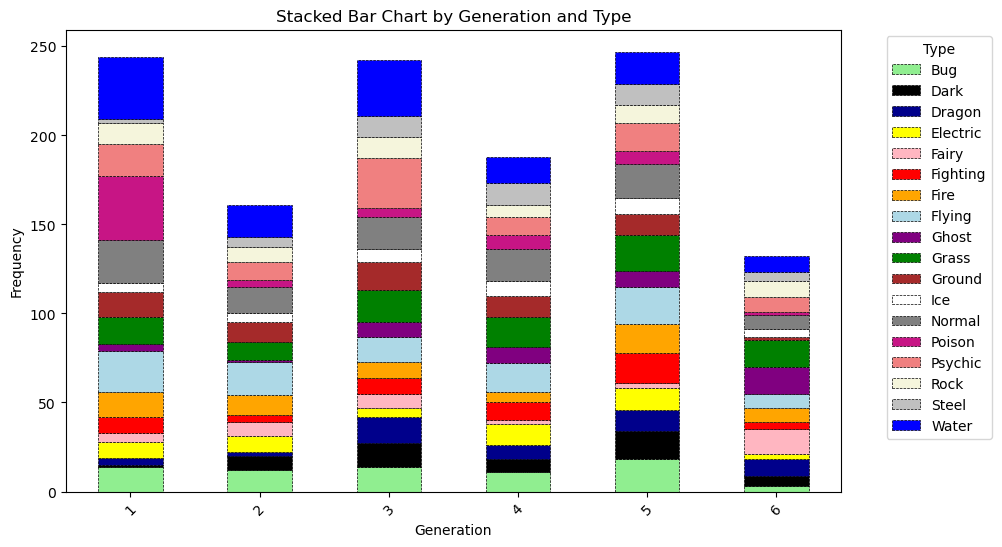

In [15]:

# Create a stacked bar chart with custom colors
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6),edgecolor="black", linestyle='dashed', linewidth=0.5, color=[type_colors.get(type, 'gray') for type in pivot_df.columns])

plt.title('Stacked Bar Chart by Generation and Type')
plt.xlabel('Generation')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
# Specify the legend outside the chart
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


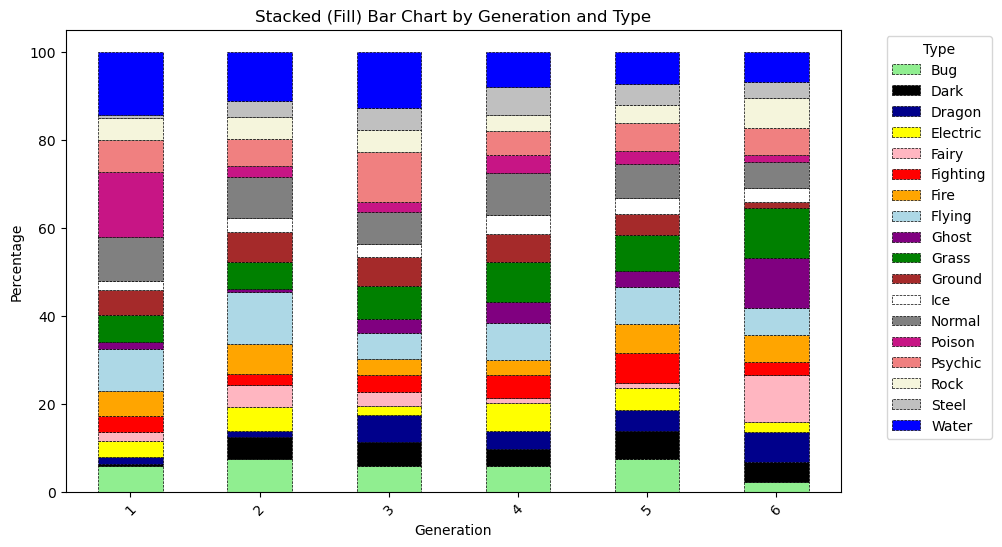

In [16]:


# Normalize the data to represent percentages
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Create a stacked bar chart with custom colors
ax = pivot_df_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=[type_colors.get(type, 'gray') for type in pivot_df_percentage.columns], linestyle='dashed', linewidth=0.5, edgecolor='black')

plt.title('Stacked (Fill) Bar Chart by Generation and Type')
plt.xlabel('Generation')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add a legend
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()